# The central theme of my inquiry in this report will be about what kinds of movies have the best chance of standing out in today's market. I'll be investigating from four different factors, formulating null hypotheses for each one of them and using data analysis to decide whether to override it or support it. In the end, I will give a concluding statement that summarizes my findings.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# load the csv file
df = pd.read_csv('tmdb-movies.csv')

#### Drop Duplicates

In [3]:
sum(df.duplicated())

1

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [12]:
def find_bestselling_directors(year, df):
    df1 = df
    df1['director'].dropna(inplace=True)  # I chose to drop NaNs in this situation because the amount of NaNs is insignificant
    df_temp = df1[df1['release_year'] == year]
    max_revenue = df_temp['revenue'].max()
    name = df_temp[df_temp['revenue'] == max_revenue].iloc[0]['director']
    if '|' in name:
        name = name.replace('|', ' and ')
        print('The best-selling directors for {0} are {1} with a revenue of {2}'.format(year, name, max_revenue))
    else:
        print('The best-selling director for {0} is {1} with a revenue of {2}'.format(year, name, max_revenue))

In [11]:
def draw_graphs(colX, colY, year, df):
    df_temp = df[df['release_year'] == year]
    df_temp[colX].dropna(inplace=True) # Drop NaNs for colX
    df_temp[colY].dropna(inplace=True) # Drop NaNs for colY
    plt.scatter(df_temp[colX], df_temp[colY])
    plt.xlabel(colX)
    plt.ylabel(colY)

In [18]:
def average_revenue(categories, df):
    result = {}
    
    # I chose to fill all the NaNs of column genre because the NaNs don't count towards the final conclusion.
    df1 = df
    df1['genres'].dropna(inplace=True)
    
    for category in categories:
        df_temp = df1[df1['genres'].str.contains(category)]
        total = float(df_temp['revenue'].sum())
        if total == 0.0:
          result[category] = 0.0
        else:
          count = len(df_temp.index)
          result[category] = total / count
            
    return result

In [24]:
def group_by_season(df):
    df['datetime'] = pd.to_datetime(df['release_date'])
    df['month'] = df['datetime'].dt.month
    revenue_by_season = {}
    grouped = df.groupby('month')
    for index, group in grouped:
        if 3 <= index < 6:
            if 'Spring' not in revenue_by_season:
                revenue_by_season['Spring'] = group['revenue'].sum()
            else:
                revenue_by_season['Spring'] = group['revenue'].sum()
        elif 6 <= index < 9:
            if 'Summer' not in revenue_by_season:
                revenue_by_season['Summer'] = group['revenue'].sum()
            else:
                revenue_by_season['Summer'] = group['revenue'].sum()
        elif 9 <= index < 12:
            if 'Fall' not in revenue_by_season:
                revenue_by_season['Fall'] = group['revenue'].sum()
            else:
                revenue_by_season['Fall'] = group['revenue'].sum()
        else:
            if 'Winter' not in revenue_by_season:
                revenue_by_season['Winter'] = group['revenue'].sum()
            else:
                revenue_by_season['Winter'] = group['revenue'].sum()
    return revenue_by_season

In [14]:
def correlation(colA, colB, df, year):
    df_temp = df[df['release_year'] == year]
    tmp = ((df_temp[colA] - df_temp[colA].mean())/ df_temp[colA].std(ddof=0)) * ((df_temp[colB] - df_temp[colB].mean()) / df_temp[colB].std(ddof=0))
    return tmp.mean()

# Question 1: Who were the bestselling directors for the years 2013-2015

# Answer for 2015:

In [15]:
find_bestselling_directors(2015, df)

The best-selling director for 2015 is J.J. Abrams with a revenue of 2068178225


# Answer for 2014:

In [16]:
find_bestselling_directors(2014, df)

The best-selling director for 2014 is Peter Jackson with a revenue of 955119788


# Answer for 2013: 

In [17]:
find_bestselling_directors(2013, df)

The best-selling directors for 2013 are Chris Buck and Jennifer Lee with a revenue of 1274219009


# Question 2: Is there any definite correlation between budget and revenue?

### From common sense, I hypothesize that there would be a very strong correlation between the two factors

### Data for 2013

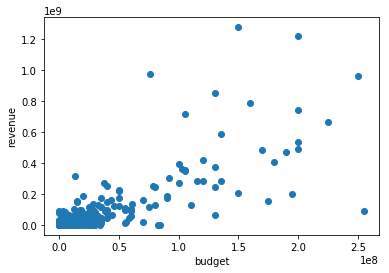

In [106]:
draw_graphs('budget', 'revenue', 2013, df)

In [16]:
print('Correlation coefficient is: {0}'.format(correlation('budget', 'revenue', df, 2013)))

Correlation coefficient is: 0.7996284902960089


### Data for 2014

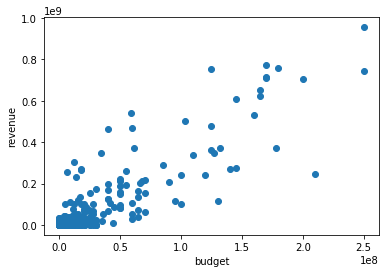

In [107]:
draw_graphs('budget', 'revenue', 2014, df)

In [15]:
print('Correlation coefficient is: {0}'.format(correlation('budget', 'revenue', df, 2014)))

Correlation coefficient is: 0.8881767111444632


### Data for 2015

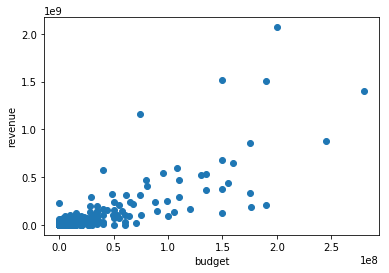

In [108]:
draw_graphs('budget', 'revenue', 2015, df)

In [17]:
print('Correlation coefficient is: {0}'.format(correlation('budget', 'revenue', df, 2015)))

Correlation coefficient is: 0.8007627509810306


### As we can see on the graphs, budget and revenue kind of stayed still for budgets below 5m. When budget is over 5m, to magnitudes of 10m and more, there is a definite positive correlation between the two variables, further consolidated by the high correlation coefficient in all 3 cases. So I choose to support my initial hypothesis

# Question 3: Does popularity have a positive correlation with revenue?

### From common sense, my null hypothesis is that there would be a very strong correlation between the two.

# Data for 2015

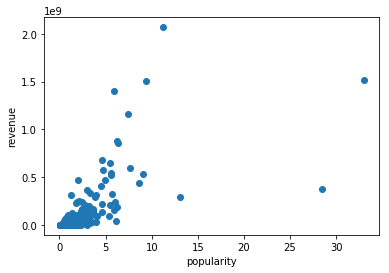

In [109]:
draw_graphs('popularity', 'revenue', 2015, df)

In [18]:
print('Correlation coefficient is: {0}'.format(correlation('popularity', 'revenue', df, 2015)))

Correlation coefficient is: 0.7022570591219259


# Data for 2014

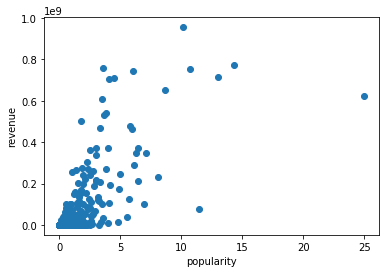

In [110]:
draw_graphs('popularity', 'revenue', 2014, df)

In [19]:
print('Correlation coefficient is: {0}'.format(correlation('popularity', 'revenue', df, 2014)))

Correlation coefficient is: 0.7484128506765001


# Data for 2013

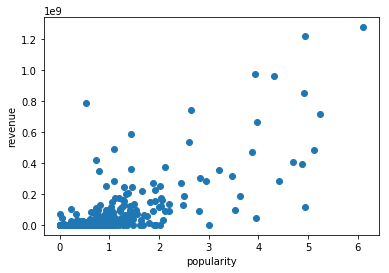

In [111]:
draw_graphs('popularity', 'revenue', 2013, df)

In [20]:
print('Correlation coefficient is: {0}'.format(correlation('popularity', 'revenue', df, 2013)))

Correlation coefficient is: 0.743663660428182


### As we can see, popularity does have a strong correlation with revenue. However, the correlation doesn't seem to be as strong as that of budget: the highest grossing film may not have the highest popularity, and vice versa. This is a rather surprising conclusion, since normally we would presume that they must be hightly positively correlated. However, after second thought, there is logic in the finding: there are indeed films which are roaring through the media propaganda, but in their essences, not as perfect as the propaganda claims. From this, I would like to overturn my initial hypothesis.

# Question 4:  Which of the major movie genres tends to have the highest revenue, in terms of the average of the revenue of all the movies in the respective categories?

### From daily moviegoing experiences, I hypothesize that Sci-Fi and Action movies are the winner. 

In [155]:
categories = ['Action', 'Comedy', 'Horror', 'Science Fiction', 'Documentary', 'Adventure', 'Animation', 'Crime', 'Drama', 'History', 'War', 'Romance', 'Western', 'Fantasy', 'Thriller', 'Family']
average = average_revenue(categories, df)

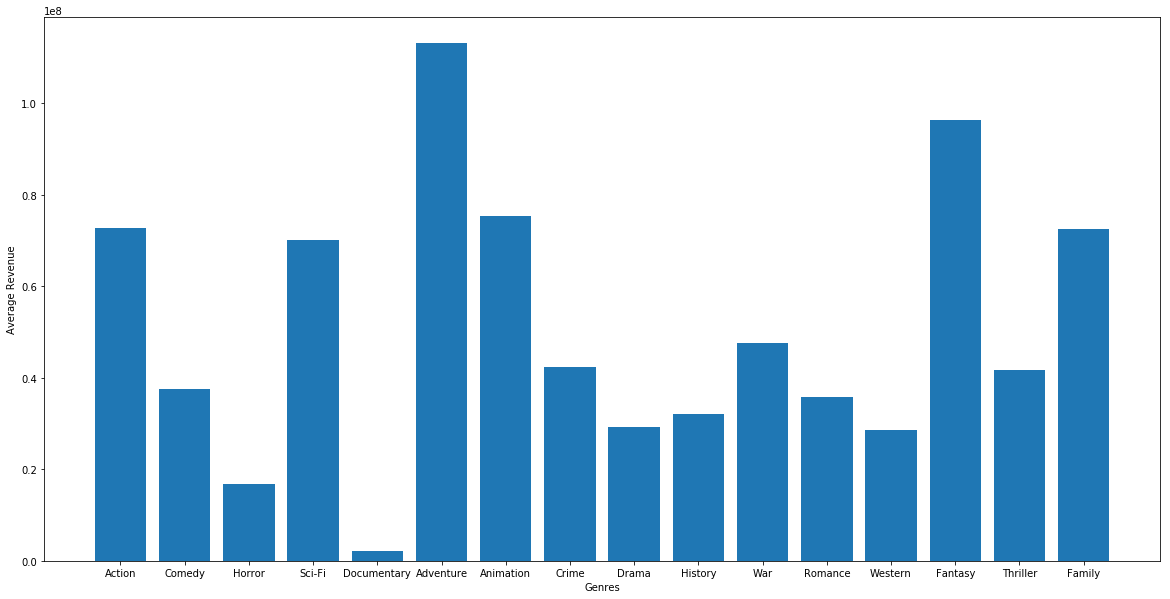

In [161]:
plt.bar([i for i in range(1, len(categories) + 1)], [average[category] for category in average])
plt.xticks([i for i in range(1, len(categories) + 1)], [category if category != 'Science Fiction' else 'Sci-Fi' for category in categories])
plt.xlabel('Genres')
plt.ylabel('Average Revenue')
plt.rcParams['figure.figsize'] = [25, 10]

### From the bar graph above, it is clear, to the contrary of my initial opinion, that adventure movies are the winner. 

# Question 5: Movies released in which season have the most total revenue?

### From common sense, I suspect that movies released in summer have the most total revenue, since summers are long vacations so people have more leisure time to go to movies

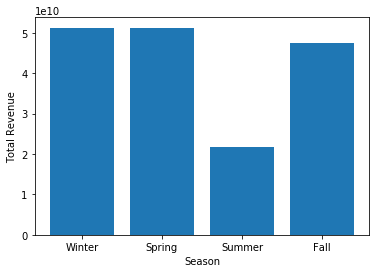

In [30]:
revenue_by_season = group_by_season(df)
plt.bar([i for i in range(1, len(revenue_by_season.values()) + 1)], [revenue_by_season[season] for season in revenue_by_season])
plt.xticks([i for i in range(1, len(revenue_by_season.values()) + 1)], [season for season in revenue_by_season])
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.rcParams['figure.figsize'] = [25, 10]

### To the contrary of common sense, it turns out that movies released during winter and spring have the best chance of standing out . After a second thought, we see that this is likely due to the fact that during summer people tend to do other kinds of things to spend the vacation like travel, while in winter, since it is a short vacation, people tend to stay home and thus have a greater chance of going to movies. 

#### However, note that the conclusions derived here are only temporary, with no further statistical inference or machine learning techniques to back them up. 

# From the above analysis, we can conclude that high-budget adventure films released during winter have the best chance of standing out in the market